In [1]:

import numpy as np 
from numpy import newaxis
import pandas as pd 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.models import Sequential
from keras import optimizers
from keras.utils import normalize
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates 

Cargamos los datos de santander


In [ ]:
def dejarPredictores(data, predictores, valor):
  print("sacando predictores")
  return data[predictores + [valor]]
def dibujarGraficaTemporal(data , valor):
  data[valor].plot()
def dividirTestTrain(data, porcentaje = 0.9):
    row = round(porcentaje * data.shape[0])
    train = data[:row]
    test = data[row:]
    return train,test
def cargarDatos(ruta, valor, fecha, len_x, len_y, predictores, division = 0.9):
  data = pd.read_csv(ruta,index_col=fecha, parse_dates=[fecha])
  print(data.head())
  print("dataset cargado")
  print(type(data[valor]))
  data2 = dejarPredictores(data, predictores, valor)
  print(data2.head())
  dibujarGraficaTemporal(data,valor)
  print(data2.shape[0])
  y = data2[valor]
  print(y.head())
  x = data2.drop(valor, axis = 1)
  x = 
  print(x.head())
  data3x = []
  data3y = []
  for i in range(data2.shape[0] - (len_x + len_y)):
    data3x.append(x[i : i + len_x])
    data3y.append(y[i + len_x :  i + len_x + len_y])
  data3x = np.array(data3x)
  data3y = np.array(data3y)
  print("x shape",data3x.shape)
  print("y shape",data3y.shape)
  row = round(division * data3x.shape[0])
  x_train = data3x[:row,]
  y_train = data3y[:row,]
  x_test = data3x[row:,]
  y_test = data3y[row:,]
  print("x train shape",x_train.shape)
  print("y train shape",y_train.shape)
  print("x test shape",x_test.shape)
  print("y test shape",y_test.shape)
  return data, x_train , y_train , x_test, y_test

            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2016-02-11  3.78  3.80  3.69   3.74   3.144030  5879600
2016-02-12  3.82  3.88  3.76   3.88   3.261722  4758200
2016-02-16  4.02  4.03  3.93   3.99   3.354193  3343200
2016-02-17  4.08  4.18  4.07   4.17   3.505510  6908200
2016-02-18  4.11  4.11  3.94   3.95   3.320567  5181500
dataset cargado
<class 'pandas.core.series.Series'>
sacando predictores
            Open  High   Low  Adj Close   Volume  Close
Date                                                   
2016-02-11  3.78  3.80  3.69   3.144030  5879600   3.74
2016-02-12  3.82  3.88  3.76   3.261722  4758200   3.88
2016-02-16  4.02  4.03  3.93   3.354193  3343200   3.99
2016-02-17  4.08  4.18  4.07   3.505510  6908200   4.17
2016-02-18  4.11  4.11  3.94   3.320567  5181500   3.95
1259
Date
2016-02-11    3.74
2016-02-12    3.88
2016-02-16    3.99
2016-02-17    4.17
2016-02-18    3.95
Name: Close, dtype: float64
           

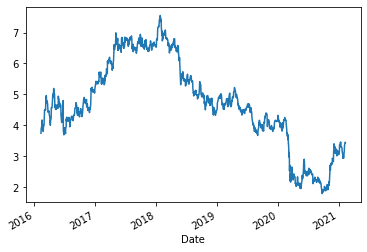

In [ ]:
ruta = '/content/drive/MyDrive/proyectos data/SAN.csv'
data = 0
open = 1
high = 2
low = 4
close = 5
adjClose = 6
colume = 7
len_x = 100
len_y = 10
#emoezamos con close
data, x_train , y_train , x_test, y_test = cargarDatos(ruta, 'Close', 'Date', len_x, len_y, ['Open','High','Low','Adj Close','Volume'])
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],x_train.shape[2], 1))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],x_test.shape[2], 1))

Creamos el modelo

In [ ]:
model = Sequential() #https://keras.io/guides/sequential_model/
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2)) #https://keras.io/api/layers/regularization_layers/dropout/
model.add(SimpleRNN(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len_y, activation = "linear")) #https://keras.io/api/layers/core_layers/dense/

model.compile(loss='mse', optimizer='adam')
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100, 50)           2800      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 100)               15100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 18,910
Trainable params: 18,910
Non-trainable params: 0
_________________________________________________________________
None


Entrenamos


In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
52/52 [==============================] - 4s 48ms/step - loss: 12.5361 - val_loss: 6.2061
Epoch 2/20
52/52 [==============================] - 2s 34ms/step - loss: 2.3466 - val_loss: 6.2597
Epoch 3/20
52/52 [==============================] - 2s 36ms/step - loss: 2.2562 - val_loss: 6.3092
Epoch 4/20
52/52 [==============================] - 2s 35ms/step - loss: 2.1822 - val_loss: 6.4595
Epoch 5/20
52/52 [==============================] - 2s 35ms/step - loss: 2.3618 - val_loss: 5.7825
Epoch 6/20
52/52 [==============================] - 2s 36ms/step - loss: 2.1983 - val_loss: 6.1421
Epoch 7/20
52/52 [==============================] - 2s 36ms/step - loss: 2.2496 - val_loss: 6.0108
Epoch 8/20
52/52 [==============================] - 2s 32ms/step - loss: 2.1235 - val_loss: 6.4120
Epoch 9/20
52/52 [==============================] - 2s 33ms/step - loss: 2.3240 - val_loss: 6.8761
Epoch 10/20
52/52 [==============================] - 2s 36ms/step - loss: 2.2388 - val_loss: 6.4955
Epoch 11

In [ ]:
    ruta = '/content/drive/MyDrive/proyectos data/IBM_2006-01-01_to_2018-01-01.csv'
    dataset = pd.read_csv('/content/drive/MyDrive/proyectos data/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
    dataset.loc[:,'Close']
    print(dataset)
    result = []
    for index in range(len(dataset) - 100):
        result.append(dataset[index: index + 100])
    result = np.array(result)
    print(result.shape)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]
  

              Open    High     Low   Close    Volume Name
Date                                                     
2006-01-03   82.45   82.55   80.81   82.06  11715200  IBM
2006-01-04   82.20   82.50   81.33   81.95   9840600  IBM
2006-01-05   81.40   82.90   81.00   82.50   7213500  IBM
2006-01-06   83.95   85.03   83.41   84.95   8197400  IBM
2006-01-09   84.10   84.25   83.38   83.73   6858200  IBM
...            ...     ...     ...     ...       ...  ...
2017-12-22  151.82  153.00  151.50  152.50   2990583  IBM
2017-12-26  152.51  153.86  152.50  152.83   2479017  IBM
2017-12-27  152.95  153.18  152.61  153.13   2149257  IBM
2017-12-28  153.20  154.12  153.20  154.04   2687624  IBM
2017-12-29  154.17  154.72  153.42  153.42   3327087  IBM

[3020 rows x 6 columns]
(2920, 100, 6)


ValueError: ignored

Entrenamos